### Creating basic Functions to operate with the ChilliX API
---
API Docs: https://chiliz.zendesk.com/hc/en-us/articles/360011405400-ChilizX-Rest-API

#### Import Libraries

In [3]:
# Import Libraries
import requests
import json
from dontshare_config import API_KEY, API_SECRET
import pandas as pd
from pandas import json_normalize

# plotting
import matplotlib.pyplot as plt
# Using plotly.express
import plotly.express as px

Auxiliar Functions

In [4]:
# Create function to get milisecond timestamp
import time

def current_milli_time():
    return round(time.time() * 1000)

#### Setting some constants

In [5]:
HOST = 'api.chiliz.net'
apiKey = API_KEY
secretKey = API_SECRET
headers = {'X-BH-APIKEY': API_KEY}

Setting Variables

In [6]:
symbol = "ETHBTC"
side = "BUY"
oder_type = "LIMIT"
timeInForce = "GTC"
quantity = "1"
price = "0.1"
recvWindow = "5000"
timestamp = str(current_milli_time())

### Fetching Market Data

#### Get the Price of the ticker

In [7]:
get_price_url = f"https://api.chiliz.net/openapi/quote/v1/ticker/bookTicker?symbol={symbol}"
get_price_url

'https://api.chiliz.net/openapi/quote/v1/ticker/bookTicker?symbol=ETHBTC'

In [8]:
response = requests.get(get_price_url, headers=headers)
print(response.status_code)
print(response.content)

200
b'{"symbol":"ETHBTC","bidPrice":"0.051112","bidQty":"0.2661","askPrice":"0.109993","askQty":"0.1746","time":1681342374091}'


In [9]:
a = response.json()
a

{'symbol': 'ETHBTC',
 'bidPrice': '0.051112',
 'bidQty': '0.2661',
 'askPrice': '0.109993',
 'askQty': '0.1746',
 'time': 1681342374091}

In [10]:
def ask_bid(ticker):
    """Get the ask bid prices for a given ticker, it makes a request to the ChillizX aPI
    using the given ticker, and then parses the response for the ask and bid prices,
    converting to float before returning them"""

    get_price_url = f"https://api.chiliz.net/openapi/quote/v1/ticker/bookTicker?symbol={ticker}"
    response = requests.get(get_price_url, headers=headers).json()
    ask = float(response["askPrice"])
    bid = float(response["bidPrice"])
    return ask, bid

In [11]:
ask_bid(ticker="TIGRESCHZ")

(14.36, 13.97)

### Get 24H Stats

https://api.chiliz.net/openapi/quote/v1/ticker/24hr?symbol=TIGRESCHZ

In [12]:
# https://stackoverflow.com/questions/44802160/convert-json-api-response-to-pandas-dataframe
# https://stackoverflow.com/questions/17839973/constructing-pandas-dataframe-from-values-in-variables-gives-valueerror-if-usi
def stats_24H(ticker): 

    get_price_url = f"https://api.chiliz.net/openapi/quote/v1/ticker/24hr?symbol={ticker}"
    response = requests.get(get_price_url, headers=headers).json()
    df = pd.DataFrame(response, index=[0])
    
    return df

In [13]:
stats_24H(ticker="ETHBTC")

,time,symbol,bestBidPrice,bestAskPrice,volume,quoteVolume,lastPrice,highPrice,lowPrice,openPrice
0,1681342500133,ETHBTC,0.051112,0.109993,0,0,0.109982,0.109982,0.109982,0.109982


### Get Candlestick Data
---

Kline/Candlestick chart intervals:

m -> minutes; h -> hours; d -> days; w -> weeks; M -> months

["1m, "3m", "5m", "15"m, "30"m, "1h", "2h", "4h", "6h", "8h", "12"h, "1d", "3d", "1w", "1M"]

"/openapi/quote/v1/klines?symbol=ETHBTC&interval=4h&limit=1000"

In [14]:
ticker="ETHBTC"
interval="1d"
limit=1000
get_price_url = f"https://api.chiliz.net/openapi/quote/v1/klines?symbol={ticker}&interval={interval}&limit={limit}"
response = requests.get(get_price_url, headers=headers).json()
response

[[1594944000000,
  '0.025593',
  '0.025654',
  '0.025379',
  '0.025434',
  '9710.7994',
  0,
  '247.76073853',
  4668,
  '0',
  '0'],
 [1595030400000,
  '0.025434',
  '0.025769',
  '0.025389',
  '0.025715',
  '17853.9386',
  0,
  '457.2857449996',
  6088,
  '0',
  '0'],
 [1595116800000,
  '0.025715',
  '0.025999',
  '0.025525',
  '0.025937',
  '25610.14',
  0,
  '657.1796810675',
  6546,
  '0',
  '0'],
 [1595203200000,
  '0.025937',
  '0.026038',
  '0.025613',
  '0.025747',
  '23576.1033',
  0,
  '611.0177802045',
  6910,
  '0',
  '0'],
 [1595289600000,
  '0.025747',
  '0.026272',
  '0.025714',
  '0.026127',
  '12445.7976',
  0,
  '322.9356329123',
  6495,
  '0',
  '0'],
 [1595376000000,
  '0.026127',
  '0.028267',
  '0.025985',
  '0.027689',
  '14466.0768',
  0,
  '381.9638779215',
  7406,
  '0',
  '0'],
 [1595462400000,
  '0.027689',
  '0.029182',
  '0.027471',
  '0.028675',
  '10316.1704',
  0,
  '289.3610244405',
  5976,
  '0',
  '0'],
 [1595548800000,
  '0.028675',
  '0.029835',
 

In [15]:
columns = ["timestamp", "open", "high", "low", "close", "volume", "close_time", "quote_volume", "number_trades", "taker_volume", "taker_quote_volume"]

In [16]:
df = pd.DataFrame(response, columns=columns)
df["timestamp"] = pd.to_datetime(df["timestamp"], unit="ms")
num_cols = ["open", "high", "low", "close", "volume", "close_time", "quote_volume", "number_trades", "taker_volume", "taker_quote_volume"]
for col in num_cols:
    try:
        df[col] = df[col].str.strip().astype(float)
    except Exception as e:
        print(f"error converting {col} to float")
        print(e)
print(df.info())
df

error converting close_time to float
Can only use .str accessor with string values!
error converting number_trades to float
Can only use .str accessor with string values!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   timestamp           1000 non-null   datetime64[ns]
 1   open                1000 non-null   float64       
 2   high                1000 non-null   float64       
 3   low                 1000 non-null   float64       
 4   close               1000 non-null   float64       
 5   volume              1000 non-null   float64       
 6   close_time          1000 non-null   int64         
 7   quote_volume        1000 non-null   float64       
 8   number_trades       1000 non-null   int64         
 9   taker_volume        1000 non-null   float64       
 10  taker_quote_volume  1000 non-null   float64   

,timestamp,open,high,low,close,volume,close_time,quote_volume,number_trades,taker_volume,taker_quote_volume
0,2020-07-17,0.025593,0.025654,0.025379,0.025434,9710.7994,0,247.760739,4668,0.0,0.0
1,2020-07-18,0.025434,0.025769,0.025389,0.025715,17853.9386,0,457.285745,6088,0.0,0.0
2,2020-07-19,0.025715,0.025999,0.025525,0.025937,25610.1400,0,657.179681,6546,0.0,0.0
3,2020-07-20,0.025937,0.026038,0.025613,0.025747,23576.1033,0,611.017780,6910,0.0,0.0
4,2020-07-21,0.025747,0.026272,0.025714,0.026127,12445.7976,0,322.935633,6495,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
995,2023-04-08,0.109982,0.109982,0.109982,0.109982,0.0000,0,0.000000,0,0.0,0.0
996,2023-04-09,0.109982,0.109982,0.109982,0.109982,0.0000,0,0.000000,0,0.0,0.0
997,2023-04-10,0.109982,0.109982,0.109982,0.109982,0.0000,0,0.000000,0,0.0,0.0
998,2023-04-11,0.109982,0.109982,0.109982,0.109982,0.0000,0,0.000000,0,0.0,0.0


<AxesSubplot:xlabel='timestamp'>

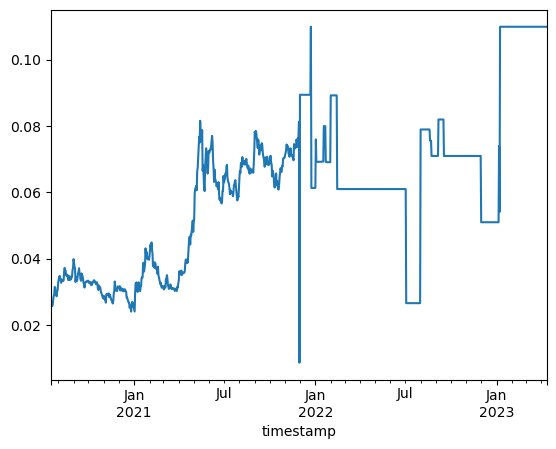

In [17]:
df.set_index("timestamp")["close"].plot()

In [18]:
def ohclv(ticker, interval, limit): 

    get_price_url = f"https://api.chiliz.net/openapi/quote/v1/klines?symbol={ticker}&interval={interval}&limit={limit}"
    response = requests.get(get_price_url, headers=headers).json()
    columns = ["timestamp", "open", "high", "low", "close", "volume", "close_time", "quote_volume", "number_trades", "taker_volume", "taker_quote_volume"]
    
    df = pd.DataFrame(response, columns=columns)
    df["timestamp"] = pd.to_datetime(df["timestamp"], unit="ms")
    num_cols = ["open", "high", "low", "close", "volume", "quote_volume", "taker_volume", "taker_quote_volume"]
    for col in num_cols:
        try:
            df[col] = df[col].str.strip().astype(float)
        except Exception as e:
            print(f"error converting {col} to float")
            print(e)
    
    return df

In [19]:
df = ohclv(ticker="TIGRESCHZ",interval="4h", limit=1000)
df["ema10"] = df["close"].ewm(span=10, min_periods=10).mean()
df["ema55"] = df["close"].ewm(span=55, min_periods=55).mean()
time_series_df = df.set_index("timestamp")[["open", "high", "low", "close", "volume","ema10","ema55"]].copy()
time_series_df

,open,high,low,close,volume,ema10,ema55
timestamp,,,,,,,
2022-12-08 12:00:00,13.30,14.98,13.01,13.04,676.0,NaN,NaN
2022-12-08 16:00:00,13.04,13.99,13.04,13.15,14810.0,NaN,NaN
2022-12-08 20:00:00,13.15,13.26,13.00,13.05,245.0,NaN,NaN
2022-12-09 00:00:00,13.05,13.20,13.05,13.20,17.0,NaN,NaN
2022-12-09 04:00:00,13.20,13.24,13.00,13.01,179.0,NaN,NaN
...,...,...,...,...,...,...,...
2023-04-12 04:00:00,15.15,15.15,14.42,14.42,6.0,14.280379,14.465906
2023-04-12 08:00:00,14.42,15.11,13.86,14.60,5691.0,14.338492,14.470695
2023-04-12 12:00:00,14.60,15.10,13.66,14.64,2688.0,14.393312,14.476742


In [20]:
import plotly.io as pio
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

In [21]:
templates = ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

In [22]:
def ema_plot(ticker, interval, limit): 

    """This function takes in three parameters: a ticker, an interval, and a limit. 
    The function then makes an API call to the Chiliz 
    OpenAPI to get the klines for the specified ticker and interval, 
    and the limit is used to limit the amount of data returned. 
    The data is then converted to a Pandas DataFrame and the columns 
    are renamed to their appropriate names. 
    Next, the function computes the exponential moving averages 
    for a 10 and 55 period window and adds these columns to the DataFrame. 
    Finally, the DataFrame is used to create a line plot using Plotly Express, which is then displayed.
    """

    get_price_url = f"https://api.chiliz.net/openapi/quote/v1/klines?symbol={ticker}&interval={interval}&limit={limit}"
    print("fetching data in real time...")
    response = requests.get(get_price_url, headers=headers).json()
    columns = ["timestamp", "open", "high", "low", "close", "volume", "close_time", "quote_volume", "number_trades", "taker_volume", "taker_quote_volume"]
    
    df = pd.DataFrame(response, columns=columns)
    df["timestamp"] = pd.to_datetime(df["timestamp"], unit="ms")
    num_cols = ["open", "high", "low", "close", "volume", "quote_volume", "taker_volume", "taker_quote_volume"]
    for col in num_cols:
        try:
            df[col] = df[col].str.strip().astype(float)
        except Exception as e:
            print(f"error converting {col} to float")
            print(e)
    
    print("Computing indicators...")
    #time.sleep(3)
    df["ema10"] = df["close"].ewm(span=10, min_periods=10).mean()
    df["ema55"] = df["close"].ewm(span=55, min_periods=55).mean()
    time_series_df = df[["timestamp","open", "high", "low", "close", "volume","ema10","ema55"]].copy()
    
    print("creating plot")
    plot_df = time_series_df[["timestamp","close","ema10","ema55"]].copy()
    fig = px.line(plot_df, x="timestamp", y=plot_df.columns,
              title=f"{ticker} {interval}", #, {min(df["timestamp"].dt.date)}, {max(df["timestamp"].dt.date)}',
              template=templates[5])
    #time.sleep(2)
    fig.show()


    return 

In [24]:
ema_plot(ticker="TIGRESCHZ", interval="4h", limit=1000)

fetching data in real time...
Computing indicators...
creating plot
